 Steps

 0. Preprocess + EDA + Feature Selection
 1. Extract input and output cols
 2. Scale the values
 3. Train test split
 4. Train the model
 5. Evaluate the model/model selection
 6. Deploy the model
     

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [4]:
df = df.iloc[:,1:]


In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
import matplotlib.pyplot as plt

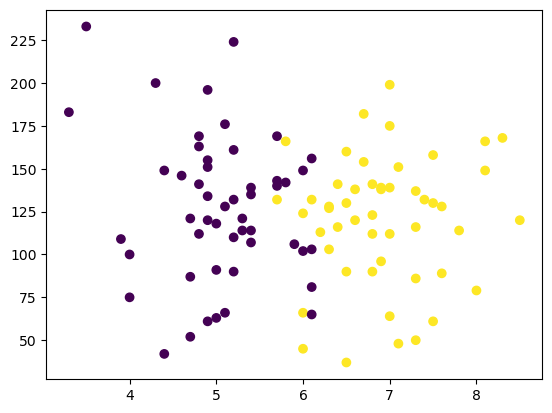

In [7]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [8]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [10]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [11]:
Y.shape

(100,)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1)

In [13]:
X_train

,cgpa,iq
93,6.8,112.0
67,5.0,118.0
35,6.8,90.0
80,4.9,196.0
69,8.5,120.0
...,...,...
22,4.9,120.0
61,7.3,137.0
99,6.2,113.0
12,5.4,139.0


In [14]:
Y_train

93    1
67    0
35    1
80    0
69    1
     ..
22    0
61    1
99    1
12    0
50    0
Name: placement, Length: 90, dtype: int64

In [15]:
X_test

,cgpa,iq
86,5.1,128.0
98,6.3,103.0
9,5.1,66.0
46,5.3,114.0
78,6.1,81.0
81,5.4,107.0
23,4.7,87.0
0,6.8,123.0
28,5.2,90.0
31,3.9,109.0


In [16]:
Y_test

86    0
98    1
9     0
46    0
78    0
81    0
23    0
0     1
28    0
31    0
Name: placement, dtype: int64

In [17]:
Y_test.shape

(10,)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 0.6448297 , -0.34708212],
       [-0.91897886, -0.1995039 ],
       [ 0.6448297 , -0.88820228],
       [-1.00585711,  1.71901303],
       [ 2.12176001, -0.15031116],
       [ 0.4710732 , -0.15031116],
       [-0.31083108,  1.05491102],
       [ 1.25297747,  0.78435094],
       [-1.00585711,  0.61217634],
       [ 0.73170795, -0.74062406],
       [ 0.38419494, -2.19180994],
       [-0.74522235, -0.39627486],
       [ 1.07922097, -0.98658777],
       [-0.91897886, -1.5523043 ],
       [-1.00585711,  0.71056183],
       [ 0.21043844,  0.02186344],
       [ 0.73170795,  0.31701989],
       [-0.74522235,  0.85814005],
       [ 0.4710732 ,  0.29242352],
       [ 0.03668193,  0.1448453 ],
       [-1.44024838,  0.5629836 ],
       [-0.22395283,  0.98112191],
       [-1.17961362, -0.12571478],
       [-0.74522235,  2.40771142],
       [ 0.73170795,  0.29242352],
       [ 0.90546446,  0.61217634],
       [ 0.81858621,  1.79280215],
       [ 0.38419494,  0.83354368],
       [-0.05019632,

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.8321006 ,  0.04645981],
       [ 0.21043844, -0.56844946],
       [-0.8321006 , -1.47851518],
       [-0.6583441 , -0.29788938],
       [ 0.03668193, -1.10956962],
       [-0.57146584, -0.47006398],
       [-1.17961362, -0.9619914 ],
       [ 0.6448297 , -0.07652204],
       [-0.74522235, -0.88820228],
       [-1.87463964, -0.42087124]])

In [24]:
import sklearn.linear_model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
#model_training
clf.fit(X_train, Y_train)


LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
Y_test

86    0
98    1
9     0
46    0
78    0
81    0
23    0
0     1
28    0
31    0
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(Y_test, y_pred)

0.9

In [32]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

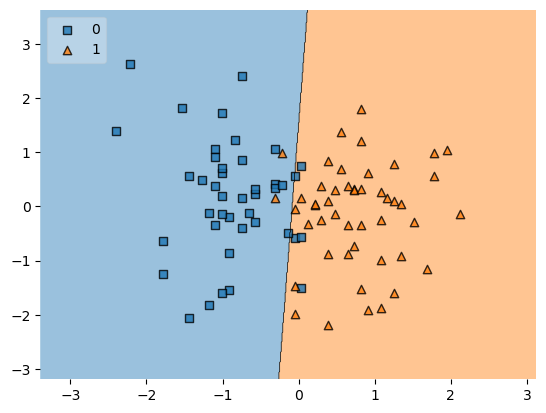

In [35]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf,open('model.pkl', 'wb'))